In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## read and describe the metadata

In [129]:
fpn_csv = './cluster_images.csv'
data = pd.read_csv(fpn_csv, encoding='ISO-8859-1')

In [130]:
# get column names
list(data)

['s_no',
 'artist',
 'title',
 'art_movement',
 'museum_venue',
 'country_of_origin',
 'has_text',
 'primary_medium',
 'medium',
 'work_size',
 'date',
 'representation',
 'representation_semi',
 'kinetic',
 'map',
 'map2',
 'spatial_dimension',
 'spatial_dimension2',
 'pl',
 'si',
 'va',
 'te',
 'co',
 'or',
 'sh',
 'reflection',
 'po',
 'li',
 'ar',
 'notes']

In [131]:
data.head(10)

,s_no,artist,title,art_movement,museum_venue,country_of_origin,has_text,primary_medium,medium,work_size,...,va,te,co,or,sh,reflection,po,li,ar,notes
0,2,Giorgio de Chirico,The Uncertainty of the Poet,surrealism,Tate,Italy,False,painting,"painting, oil on canvas",106 x 94 cm,...,3,0,0,4,3,False,0,0,5,"distorted perspective, shadow, signification o..."
1,3,Giovanni Anselmo,Direction,arte povera,Tate,Italy,False,sculpture,"sculpture, fabric, glass & metal",24 x 420 x 335 cm,...,1,3,0,3,2,False,0,0,5,"hard to understand the viewpoint, sense of for..."
2,4,Milton Avery,Yellow Sky,modernism,Tate,America,False,painting,"painting, oil on canvas",156 x 184 cm,...,2,4,4,2,4,False,0,0,5,"flatish, textured shapes & specific colors-lin..."
3,5,Gillian Avery,Distillation,abstraction,Tate,UK,False,painting,"painting, oil, household paint on hardboard",213 x 152 cm,...,1,2,0,2,4,False,0,0,5,"shapes, layers, paint handlng/texture, orienta..."
4,6,Joseph (Jef) Banc,Pair-Bearing Matrix,abstraction,Tate,France,False,painting,"painting, mixed media on canvas",73 x 60 cm,...,1,4,1,0,4,False,0,0,5,"ambiguity through abstraction, odd shape, v te..."
5,7,Fiona Banner,Break Point,conceptual,Tate,UK,True,painting,"painting, marker pen, acrylic on canvas",274 x 427 x 6 cm,...,1,2,0,0,0,False,0,5,0,ambiguity to do with reading text: placement o...
6,8,Thomas Barker of Bath,The Woodman and his Dog in a Storm,representation,Tate,UK,False,painting,"painting, oil on canvas",236 x 149 cm,...,4,1,0,4,1,False,0,0,5,"dark values, both pairs of eyes fixed on objec..."
7,9,Uta Barth,Field #20,conceptual,Tate,Germany,False,photography,"photo, digital print w/ acrylic on canvas",346 x 416 cm,...,1,5,0,0,1,False,0,0,5,"v pixelated, very, very large photo; texture:p..."
8,10,Willi Baumeister,Untitled (Suspended Lines I),abstraction,Tate,Germany,False,print,"print, lithograph on paper",26 x 21 cm,...,1,1,0,4,3,False,0,5,0,"lines don't meet, orientation of lines creates..."
9,11,Larry Bell,Untitled,postminimal,Tate,United States,False,installation,"installation,sculpture, coated glass",188 x 549 x 244 cm,...,5,3,0,0,1,True,0,0,5,"coating on glass greater at base, fragility of..."


## create a subset of the columns you will use to fit KMeans

Here, I am **arbitrarily** choosing the seven [visual variables defined by Bertin](https://infovis-wiki.net/wiki/Visual_Variables). Variable descriptions [here](https://github.com/visualizedata/ml/blob/master/ML_assignment_3/option_2/contents-of-cluster_images.csv). 

You should choose the columns that you decide will best define the clusters. You may need to make transformations on existing variables. 

In [132]:
# feature process
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.sparse import csr_matrix, hstack


vectorizer = CountVectorizer()
transformer = TfidfTransformer()
        

primary_medium = data['primary_medium']
primary_medium = vectorizer.fit_transform(primary_medium)
primary_medium = transformer.fit_transform(primary_medium)
print('primary_medium feature: ', primary_medium.shape)



medium = data['medium']
medium = vectorizer.fit_transform(medium)
medium = transformer.fit_transform(medium)
print('medium feature: ', medium.shape)

notes = data['notes']
notes = vectorizer.fit_transform(notes)
notes = transformer.fit_transform(notes)
print('notes feature: ', notes.shape)


title = data['title'].values.astype('U')
title = vectorizer.fit_transform(title)
title = transformer.fit_transform(title)
print('title feature: ', title.shape)


art_movement = data['art_movement'].values.astype('U')
art_movement = vectorizer.fit_transform(art_movement)
art_movement = transformer.fit_transform(art_movement)
print('art_movement feature: ', art_movement.shape)


X = data[['pl', 'si', 'va', 'te', 'co', 'or', 'sh']]
print(X.shape)

X = hstack([title, art_movement, X])
print('The final feature that we use: ',X.shape)

primary_medium feature:  (404, 7)
medium feature:  (404, 445)
notes feature:  (404, 2059)
title feature:  (404, 857)
art_movement feature:  (404, 36)
(404, 7)
The final feature that we use:  (404, 900)


# KMeans

In [133]:
from sklearn.cluster import KMeans

## plot inertia scores by number of clusters

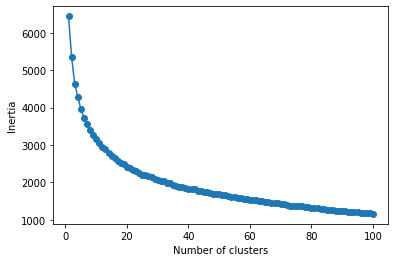

In [134]:
# first attempt at fitting K means to view change in Inertia

# container to store inertia scores over iterations
distortions = []

# fit KMeans iteratively to begin to assess the appropriate number of clusters
for i in range(1, 101):
    km = KMeans(n_clusters=i)
    km.fit(X)
    distortions.append(km.inertia_)
    
# vizualize change in inertia
plt.plot(range(1, 101), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## create silhouette plots to assess various specifications for `n_clusters` in `KMeans`

In [135]:
# modify this list to include the numbers of clusters you want to see
# I have *arbitrarily* chosen these values
range_n_clusters = [5, 10, 15, 20,25,30,40]

For n_clusters = 5 The average silhouette_score is : 0.14478895822848867


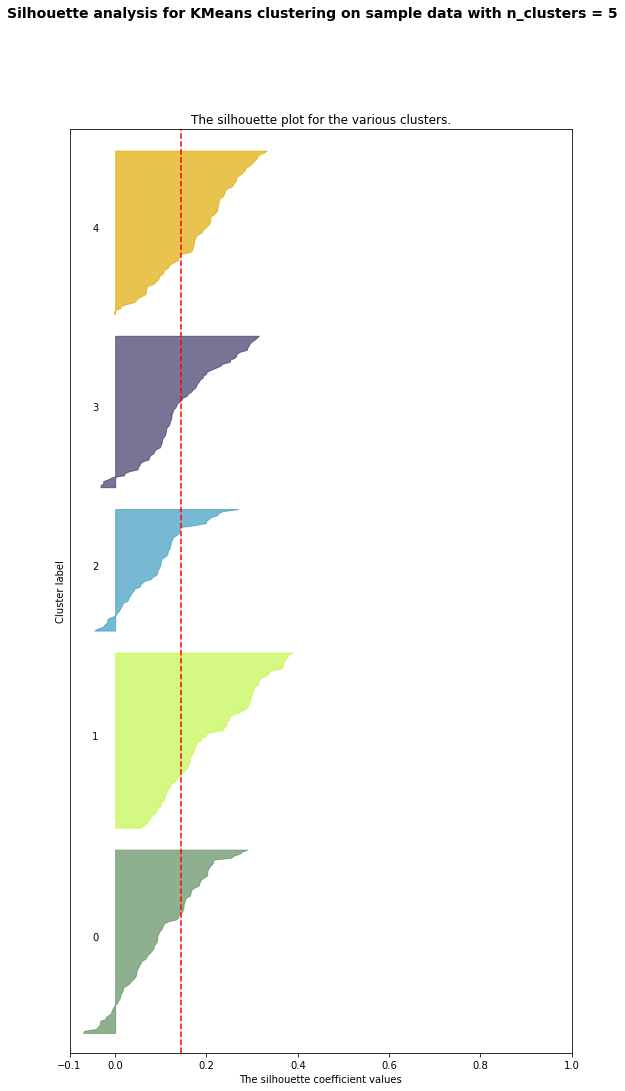

For n_clusters = 10 The average silhouette_score is : 0.14256786196345064


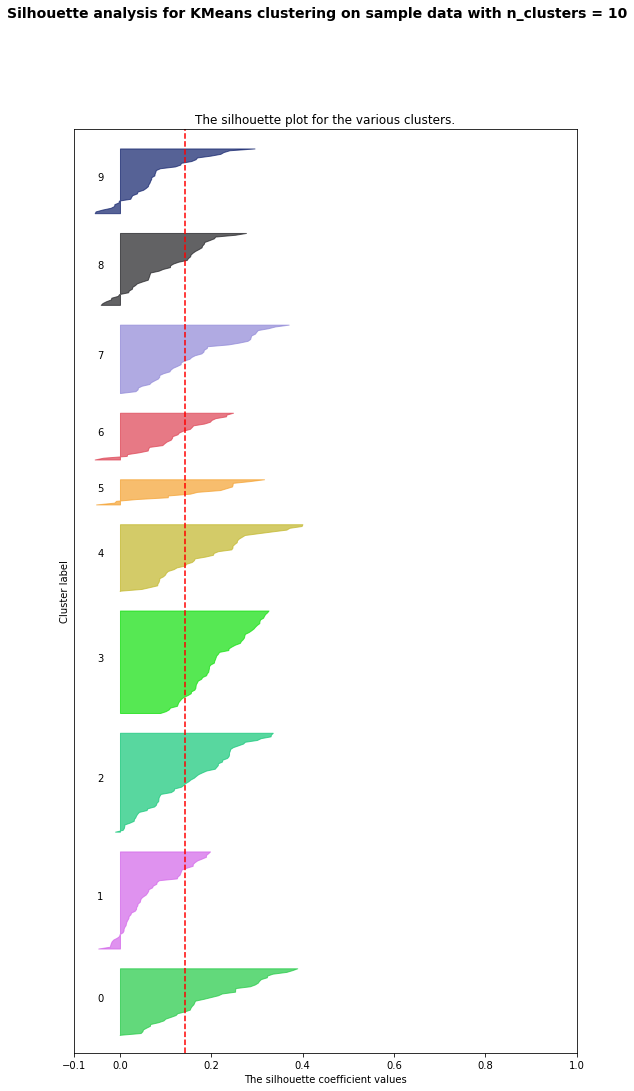

For n_clusters = 15 The average silhouette_score is : 0.13558310547935218


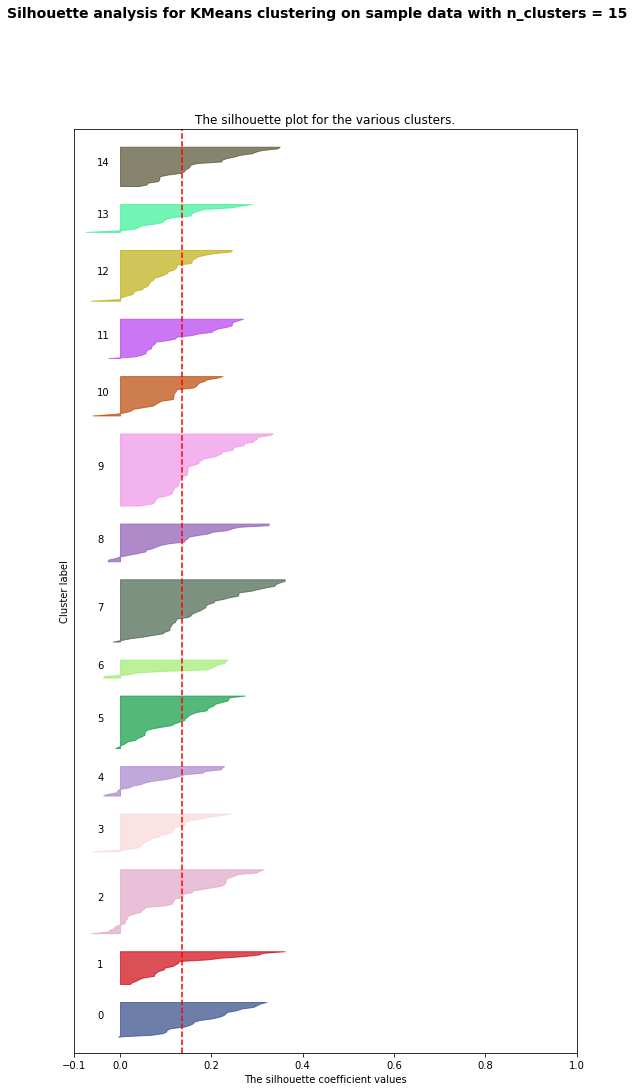

For n_clusters = 20 The average silhouette_score is : 0.13349700659691208


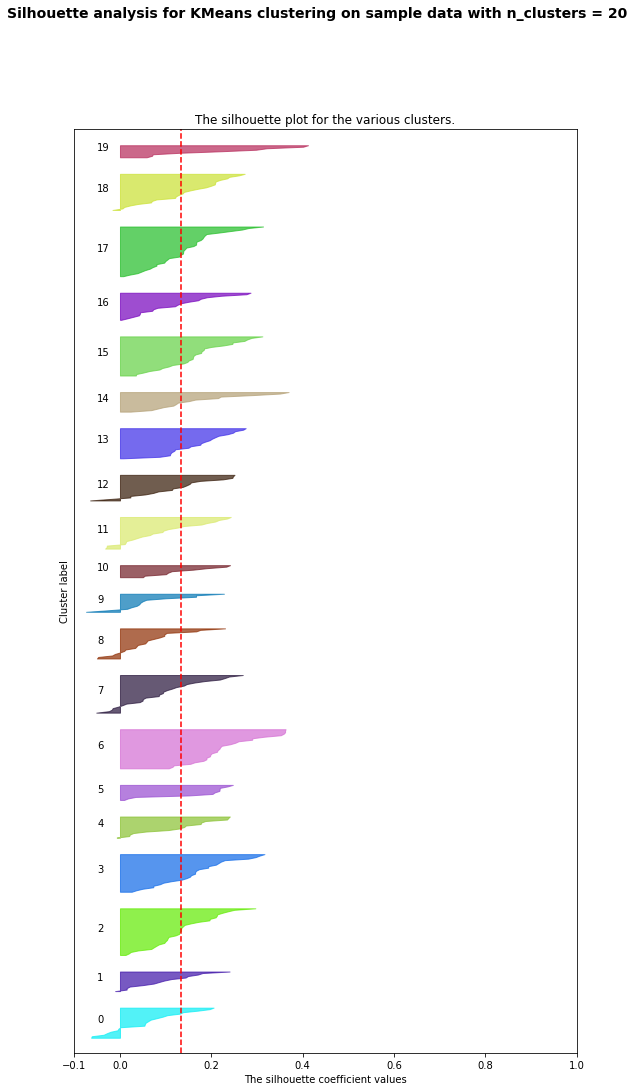

For n_clusters = 25 The average silhouette_score is : 0.12480293759969036


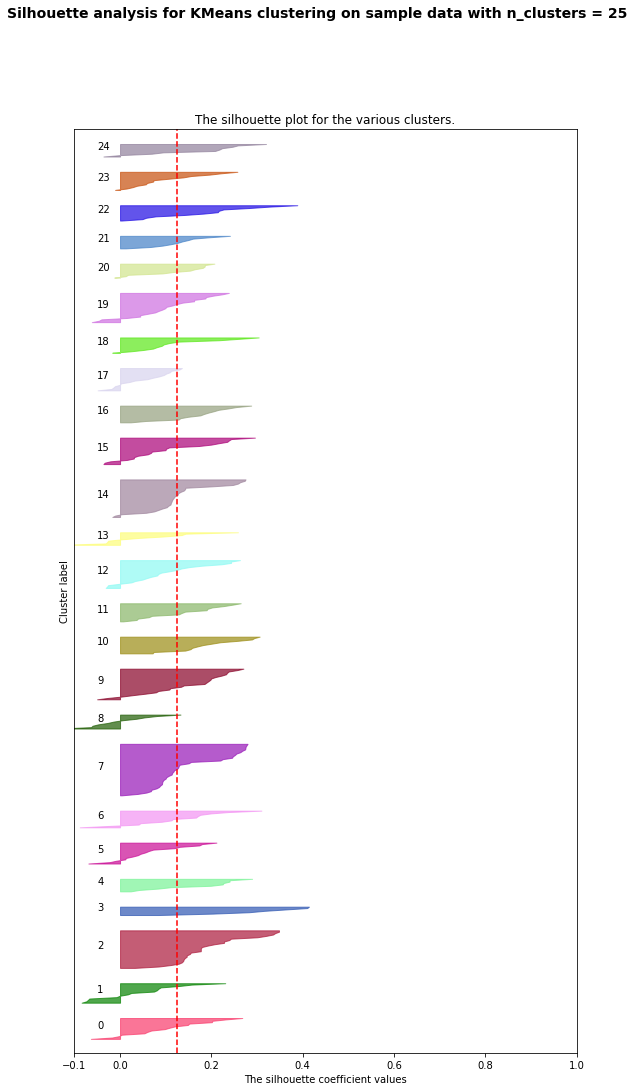

For n_clusters = 30 The average silhouette_score is : 0.11908276352872088


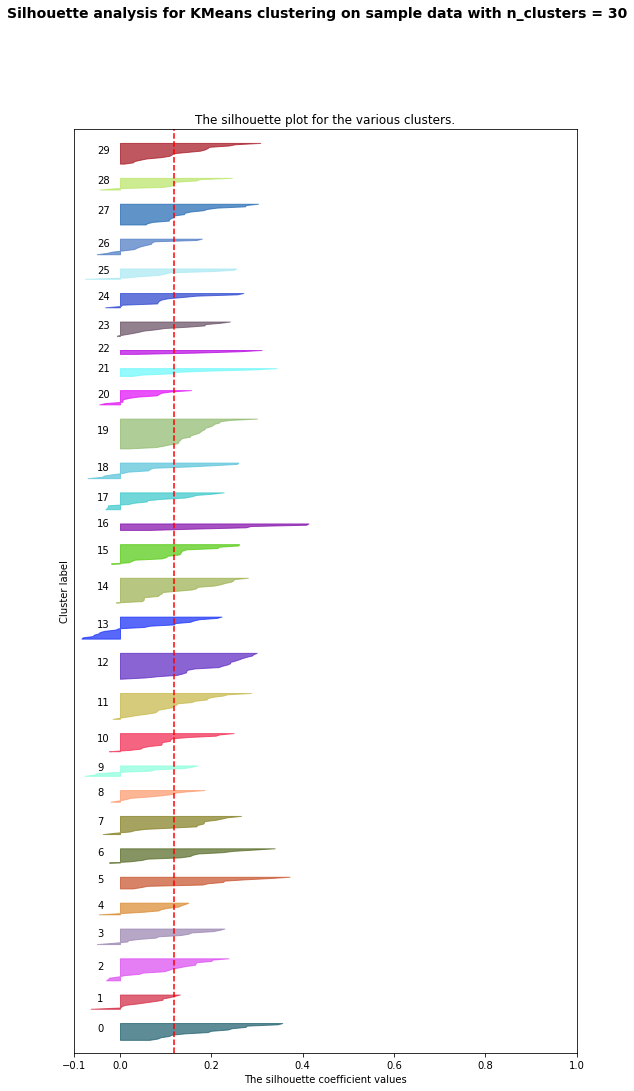

For n_clusters = 40 The average silhouette_score is : 0.12084391889399572


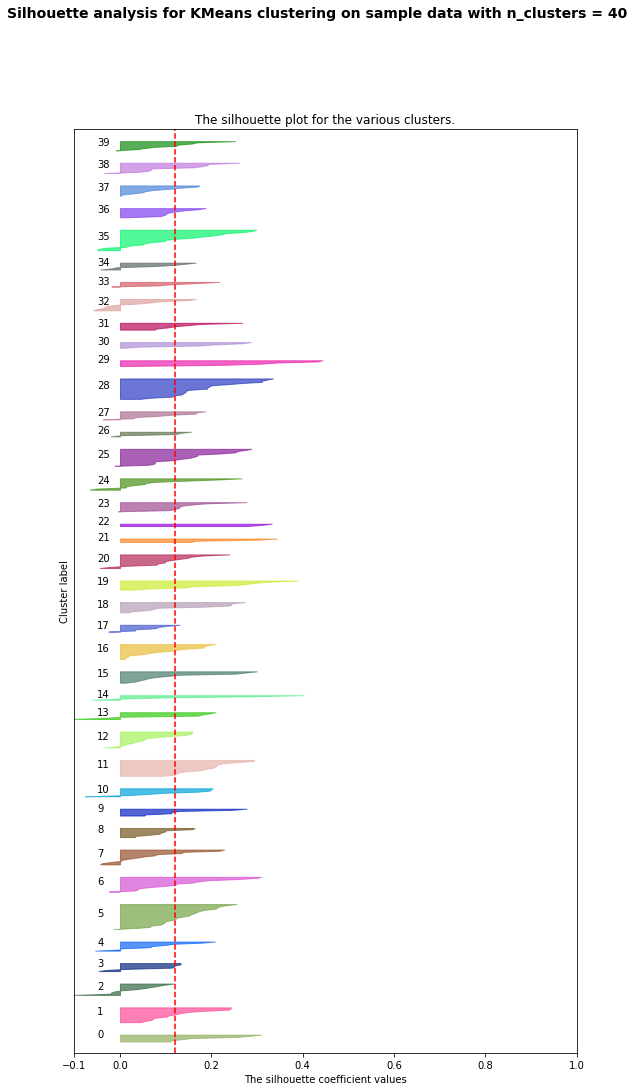

In [136]:
# modified from: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import random

for n_clusters in range_n_clusters:
    # Create a subplot
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 17)

    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # select a random color for this cluster
        r = lambda: random.randint(0,255)
        color = '#%02X%02X%02X' % (r(),r(),r())
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

## final fit

After you have decided which features to include and the number of clusters you want, fit your final KMeans model. I have **arbitrarily** chosen 5. 

In [174]:
# set the number of clusters in the final model
my_n_clusters = 10

In [175]:
km = KMeans(n_clusters=my_n_clusters)
km.fit(X)

KMeans(n_clusters=10)

## look at results

The key to knowing if you have chosen the right features and clusters: looking at the images in each cluster and deciding whether they seem to belong together. You could extend this starter code to display the images in this notebook, or you may decide to use Python to write an html file/files to view the images by cluster.

In [176]:
for i in range(0, max(km.labels_)+1):
    print(" ")
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    print("Images in cluster: " + str(i))
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    for j in range(0, len(km.labels_)):
        if km.labels_[j] == i:
            print(str(j+2) + '_small.jpg')

 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 0
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
12_small.jpg
22_small.jpg
33_small.jpg
45_small.jpg
49_small.jpg
53_small.jpg
74_small.jpg
110_small.jpg
113_small.jpg
124_small.jpg
136_small.jpg
137_small.jpg
147_small.jpg
150_small.jpg
151_small.jpg
180_small.jpg
182_small.jpg
202_small.jpg
218_small.jpg
230_small.jpg
236_small.jpg
261_small.jpg
268_small.jpg
272_small.jpg
274_small.jpg
277_small.jpg
289_small.jpg
293_small.jpg
297_small.jpg
302_small.jpg
313_small.jpg
320_small.jpg
336_small.jpg
354_small.jpg
355_small.jpg
357_small.jpg
370_small.jpg
382_small.jpg
386_small.jpg
391_small.jpg
395_small.jpg
 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 1
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
11_small.jpg
13_small.jpg
15_small.jpg
16_small.jpg
28_small.jpg
69_small.jpg
72_small.jpg
75_small.jpg
88_small.jpg
108_small.jpg
122_small.jp

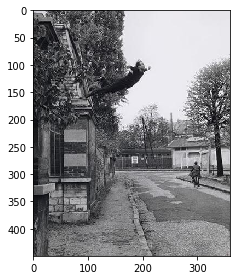

In [182]:
from skimage import io
io.imshow(io.imread('./img_small/85_small.jpg'))